### Calculate the PMEs for the funds

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.optimize import newton
from datetime import datetime

In [14]:
from pme_calc import sp500_data, index_weighted_cashflows, ln_pme, ks_pme, pme_plus, direct_alpha, xirr, moic
from data_gen import simulate_private_equity_cashflows
sp500_final = sp500_data()
cashflows = simulate_private_equity_cashflows()
df = index_weighted_cashflows(cashflows, sp500_final)

[*********************100%***********************]  1 of 1 completed


In [15]:
pme_funds = []
for fund_id in df['FundID'].unique():
    fund_df = df[df['FundID'] == fund_id].reset_index(drop=True)
    pme_funds.append({
        'FundID': fund_id,
        'LN_PME': ln_pme(fund_df),
        'KS_PME': ks_pme(fund_df),
        'PME_plus': pme_plus(fund_df),
        'Direct_Alpha': direct_alpha(fund_df),
        'IRR': xirr(fund_df['date'], fund_df['Cashflow']),
        'moic': moic(fund_df)
    })

In [16]:
pme_funds[16]

{'FundID': 16,
 'LN_PME': nan,
 'KS_PME': 1.9641117079438288,
 'PME_plus': -0.0284106994767426,
 'Direct_Alpha': 0.15505877473191257,
 'IRR': 0.11267011844084437,
 'moic': 1.6944582508334687}

In [17]:
ln_pme_list = []
for i in range(2000):
    ln_pme_list.append(pme_funds[i]['LN_PME'])

ks_pme_list = []
for i in range(2000):
    ks_pme_list.append(pme_funds[i]['KS_PME'])

pme_plus_list = []
for i in range(2000):
    pme_plus_list.append(pme_funds[i]['PME_plus'])

direct_alpha_list = []
for i in range(2000):
    direct_alpha_list.append(pme_funds[i]['Direct_Alpha'])

irr_list = []
for i in range(2000):
    irr_list.append(pme_funds[i]['IRR'])

moic_list = []
for i in range(2000):
    moic_list.append(pme_funds[i]['moic'])

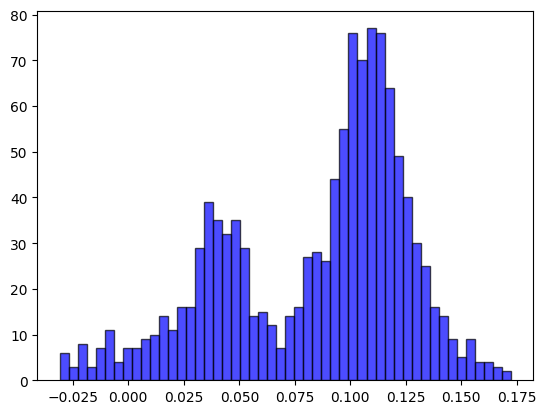

In [18]:
plt.hist(ln_pme_list, bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.show()

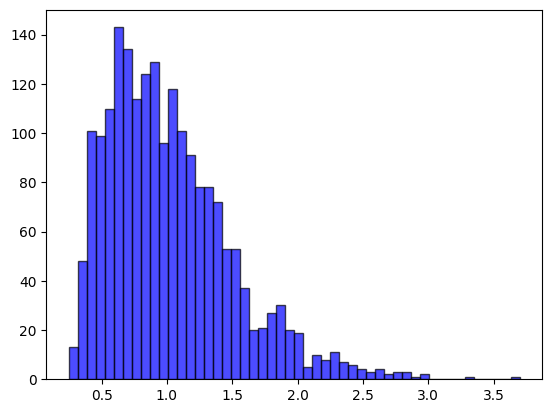

In [19]:
plt.hist(ks_pme_list, bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.show()

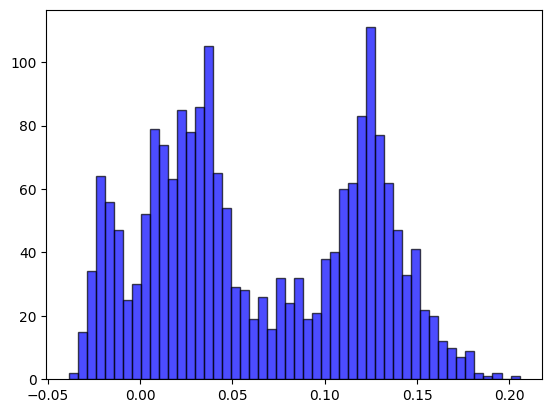

In [20]:
plt.hist(pme_plus_list, bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.show()

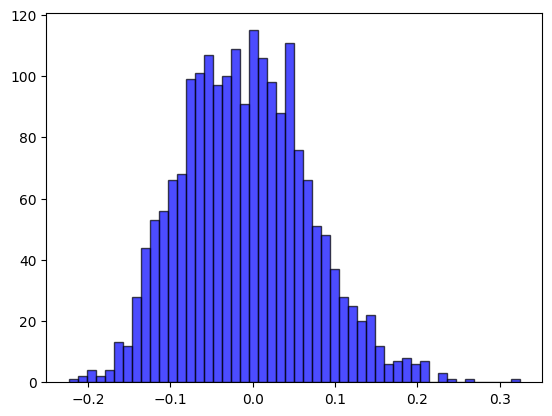

In [21]:
plt.hist(direct_alpha_list, bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.show()

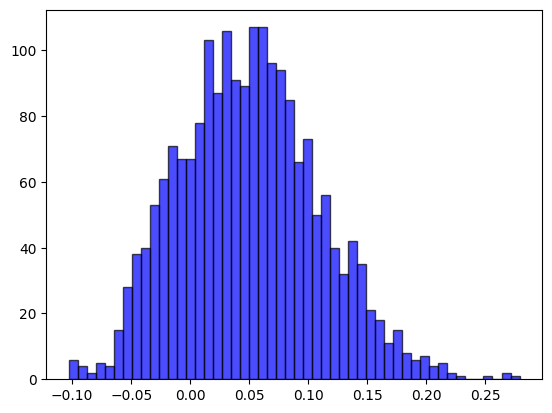

In [22]:
plt.hist(irr_list, bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.show()

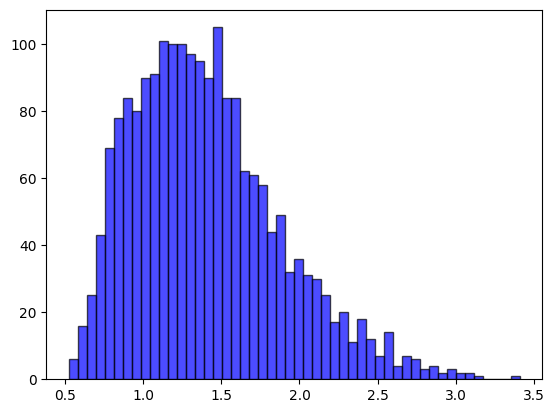

In [23]:
plt.hist(moic_list, bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.show()